# Data Analytics Coursework


# Overview
<hr />

The goal of this lab is to determine what important features we need to look out for for the people who bought caravan insurance in order to help us predict who else to offer the policy to.

### Business Objective:

You are a data scientist working for the fictitious insurance company.  You have been tasked to determine if we can predict who to provide caravan (mobile home) insurance to and whom not to based on various factors.   Ideally we’d want a balanced portfolio and NOT give insurance to a majority of high risk of default individuals.  Secondly for regulatory auditing purposes you have to help explain why the model gives insurance to certain individuals and not others.  (i.e. which features are the most important)

# Data
<hr />

For this coursework, we will be utilizing the dataset from the caravan-insurance-challenge on kaggle. It is split up into a training set and an evaluation set, which we utilize the "ORIGIN" field to determine which row of data is for which set. There are then 86 other columns utilized as "features" of the dataset.

The data contains 5822 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Variable 86 (Caravan) indicates whether the customer purchased a caravan insurance policy. 

### References

https://www.kaggle.com/datasets/uciml/caravan-insurance-challenge

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("/kaggle/input/caravan-insurance-challenge/caravan-insurance-challenge.csv")

/kaggle/input/caravan-insurance-challenge/caravan-insurance-challenge.csv


# EDA
<hr />

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

all_vars = df.drop(['ORIGIN'], axis=1)

print(df.head())


  ORIGIN  MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  \
0  train       33         1        3         2         8       0       5   
1  train       37         1        2         2         8       1       4   
2  train       37         1        2         2         8       0       4   
3  train        9         1        3         3         3       2       3   
4  train       40         1        4         2        10       1       4   

   MGODOV  MGODGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       1       3  ...         0        0        0       1        0         0   
1       1       4  ...         0        0        0       1        0         0   
2       2       4  ...         0        0        0       1        0         0   
3       2       4  ...         0        0        0       1        0         0   
4       1       4  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  CARAVAN  
0       0       

In [3]:
#parsing for predictive variables
x_vars = all_vars.drop(['CARAVAN'], axis=1)

#parsing target variable
y = df['CARAVAN']

print(y[0:5])
all_vars.head()
print(all_vars.shape)
print(y.shape)

0    0
1    0
2    0
3    0
4    0
Name: CARAVAN, dtype: int64
(9822, 86)
(9822,)


In [4]:

# standardize the data 
X_std = StandardScaler().fit_transform(x_vars)
print(X_std.shape)
mean_vec = np.mean(X_std, axis=0)
print(mean_vec.shape)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

(9822, 85)
(85,)
Covariance matrix 
[[ 1.00010182 -0.04033167 -0.0065945  ... -0.0255354  -0.01633792
  -0.04375385]
 [-0.04033167  1.00010182 -0.00431565 ... -0.01252764  0.0319394
  -0.005852  ]
 [-0.0065945  -0.00431565  1.00010182 ...  0.01848839  0.01092878
   0.03085877]
 ...
 [-0.0255354  -0.01252764  0.01848839 ...  1.00010182  0.00204416
   0.00712214]
 [-0.01633792  0.0319394   0.01092878 ...  0.00204416  1.00010182
   0.01727922]
 [-0.04375385 -0.005852    0.03085877 ...  0.00712214  0.01727922
   1.00010182]]


In [5]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.80741073e-01  1.90012238e-01 -1.08200120e-02 ...  1.19823729e-02
   1.86481597e-03 -3.99575753e-04]
 [ 6.86446049e-05 -9.97766755e-03  1.42353206e-02 ...  5.62264287e-03
   1.64017734e-03 -1.88420999e-03]
 [ 1.21471618e-01  2.78081107e-01  9.89312897e-02 ... -1.32823262e-03
  -4.33591381e-03 -1.66503718e-03]
 ...
 [ 1.26127757e-02 -1.12937278e-02  2.14048183e-02 ... -9.27489842e-03
  -2.15410748e-02 -4.32546502e-03]
 [ 1.32624344e-02 -5.62562226e-03 -1.97657957e-02 ... -1.93069813e-03
  -1.94621753e-03 -5.83645630e-03]
 [ 2.36962778e-02  1.36883444e-02 -4.79283762e-02 ... -4.76677274e-02
   1.50691498e-02 -3.00046503e-02]]

Eigenvalues 
[9.38114298e+00 4.90789884e+00 3.98336652e+00 3.34322942e+00
 2.92824840e+00 2.64384083e+00 2.26219960e+00 2.23659410e+00
 2.14010672e+00 2.10857567e+00 2.00996208e+00 1.95746407e+00
 1.91389055e+00 1.90310544e+00 1.86888982e+00 1.84630241e+00
 1.79586996e+00 1.81596659e+00 1.72663381e+00 1.68813177e+00
 1.55440514e+00 1.64806302e+00 

In [6]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
9.381142977613983
4.907898835290034
3.9833665153202196
3.3432294190880576
2.92824840408575
2.643840825422755
2.2621995988975154
2.2365941012610056
2.1401067208665636
2.1085756738176604
2.009962077835744
1.9574640743904292
1.9138905513816804
1.9031054408149695
1.8688898187031346
1.8463024054236603
1.7958699616021123
1.8159665850301787
1.726633806447737
1.6881317691099644
1.5544051360185498
1.6480630196651014
1.6203182998445114
1.3845795550757216
1.4537353605827472
1.4274632184210816
1.3184756309410242
1.2746179004695155
1.192600617337958
1.2085220336718443
1.1348462459162496
1.0579470236967838
0.973410106890478
0.9486849890740686
0.8761095055342205
0.852179200845102
0.8142695724052896
0.79574103996686
0.773204969880633
0.7134889601937563
0.7538246625268787
0.6191004755972036
0.6791042442804212
0.5620455091268601
0.5957938716020615
0.4633058189528184
0.469505045897235
0.3816307805104774
0.32168050224186195
0.33830814987896257
0.19727599644644414
0.1709374

# (a) Base Model
<hr />

In [7]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(x_vars, y, test_size=0.25, random_state=16)

df_train = df[df['ORIGIN'] == 'train']
df_test = df[df['ORIGIN'] == 'test']

X_train = df_train.iloc[:,1:-1]
y_train = df_train['CARAVAN']

X_test = df_test.iloc[:,1:-1]
Y_test = df_test['CARAVAN']


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


model = LogisticRegression(random_state=1, max_iter=250).fit(X_train_std, y_train)

Y_predict = model.predict(X_test_std)
print("LogisticRegression Accuracy: %.3f" %metrics.accuracy_score(Y_test, Y_predict))

LogisticRegression Accuracy: 0.940


# (b) Logistic Regression with Stepwise Selection (based on p-values)
<hr />

In [8]:

# forward/backward feature selection based on p-value
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(df.drop(['ORIGIN'], axis=1).drop(['CARAVAN'], axis=1), df.drop(['ORIGIN'], axis=1)['CARAVAN'])

print('resulting features:')
print(result)


Add  PPERSAUT                       with p-value 2.14684e-42
Add  MKOOPKLA                       with p-value 1.36739e-21
Add  PWAPART                        with p-value 3.66711e-15
Add  APLEZIER                       with p-value 8.20766e-15
Add  MOPLHOOG                       with p-value 4.25236e-06
Add  PBRAND                         with p-value 3.92829e-06
Add  MBERBOER                       with p-value 8.31838e-06
Add  MRELGE                         with p-value 1.41977e-05
Add  PWALAND                        with p-value 0.000361295
Add  ABRAND                         with p-value 0.000937601
Add  AZEILPL                        with p-value 0.00153041
Add  MINK123M                       with p-value 0.00152554
Add  PBYSTAND                       with p-value 0.00243579
Add  PGEZONG                        with p-value 0.00485648
Add  AGEZONG                        with p-value 0.00450709
Add  MHHUUR                         with p-value 0.00630075
resulting features:
['PPERSAUT

In [9]:
sc = StandardScaler()
sc.fit(X_train.filter(items=result))
X_train_std = sc.transform(X_train.filter(items=result))

X_test_std = sc.transform(X_test.filter(items=result))

model = LogisticRegression(random_state=1, max_iter=250).fit(X_train_std, y_train)

Y_predict = model.predict(X_test_std)
print("LogisticRegression with stepwise selection accuracy: %.3f" %metrics.accuracy_score(Y_test, Y_predict))

LogisticRegression with stepwise selection accuracy: 0.941


# (c) PCA
<hr />

[0.59470625 0.0962327 ]


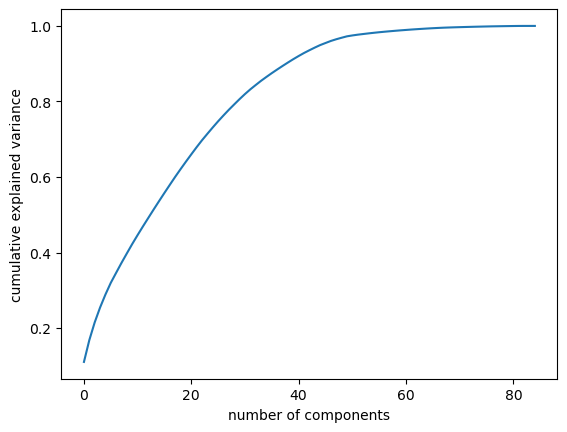

In [10]:
#PCA
pca = PCA(n_components=2)
pca.fit_transform(all_vars)
print(pca.explained_variance_ratio_ )

pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Explained Variance: [5.94706251e-01 9.62326969e-02 3.89621008e-02 2.92561380e-02
 2.78462153e-02 2.31105166e-02 1.64023279e-02 1.45620966e-02
 1.35911777e-02 1.28291638e-02 1.22427588e-02 1.07497156e-02
 9.70368945e-03 9.16128507e-03 7.98110262e-03 7.43473212e-03
 6.49402561e-03 5.92554708e-03 5.12841764e-03 4.90253590e-03
 4.62962733e-03 4.45499202e-03 4.24464030e-03 3.94203750e-03
 3.68490974e-03 3.01455730e-03 2.83262013e-03 2.61795387e-03
 2.55721983e-03 2.20747941e-03 2.15034933e-03 1.74332755e-03
 1.37003797e-03 1.24506927e-03 1.18398201e-03 1.12153628e-03
 1.06921373e-03 8.34424793e-04 7.94964674e-04 5.49350022e-04
 5.35887847e-04 5.20212492e-04 4.95265879e-04 4.51695065e-04
 3.65238161e-04 3.17128657e-04 2.89852645e-04 2.77316949e-04
 2.47844060e-04 2.42929446e-04 2.19469025e-04 2.15449052e-04
 2.06713084e-04 2.03327157e-04 1.98577504e-04 1.92491720e-04
 1.80972034e-04 1.70451763e-04 1.65053119e-04 1.63782167e-04
 1.61538622e-04 1.57507407e-04 1.45937425e-04 1.22917967e-04
 1.1

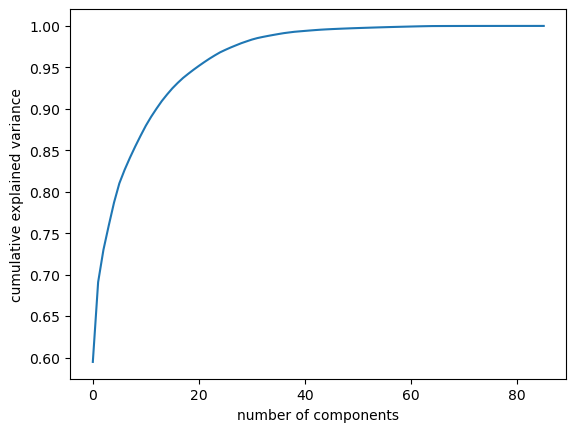

In [11]:
# feature extraction
pca = PCA()
fit = pca.fit(all_vars)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

pca = PCA(0.75).fit(all_vars)
print("Number of components needed to explain 75% of the variance: ")
print(pca.n_components_)

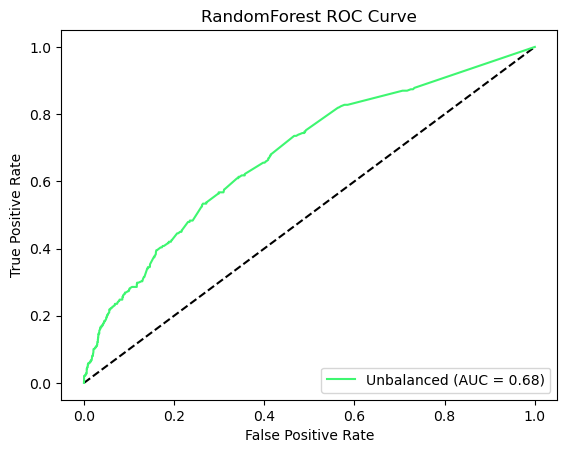

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

df_train = df[df['ORIGIN'] == 'train']
df_test = df[df['ORIGIN'] == 'test']


df_train_x = df_train.iloc[:,1:-1]
df_train_y = df_train['CARAVAN']

df_test_x = df_test.iloc[:,1:-1]
df_test_y = df_test['CARAVAN']

rfc = RandomForestClassifier(n_estimators=100, random_state = 1)
rfc.fit(df_train_x, df_train_y)
y_pred_prob = rfc.predict_proba(df_test_x)[:,1]
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred_prob)
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Unbalanced", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC Curve')
plt.legend(loc="lower right")
plt.show()

# (d) Random Forest Model

Random Forest based on feature importance feature selection accuracy: 0.933
 1) PBRAND                         0.054819
 2) PPERSAUT                       0.043050
 3) APERSAUT                       0.042261
 4) MOSTYPE                        0.038042
 5) PWAPART                        0.028412
 6) MKOOPKLA                       0.024754
 7) ABRAND                         0.022063
 8) MOSHOOFD                       0.021528
 9) AWAPART                        0.021249
10) MBERMIDD                       0.019747
11) MFWEKIND                       0.019054
12) MOPLMIDD                       0.018587
13) MGODGE                         0.018423
14) MINK3045                       0.018160
15) MGODPR                         0.017852
16) MSKC                           0.017702
17) MOPLLAAG                       0.017632
18) MFGEKIND                       0.017342
19) MOPLHOOG                       0.016791
20) MINK4575                       0.016491
21) MBERARBG                       0.016489


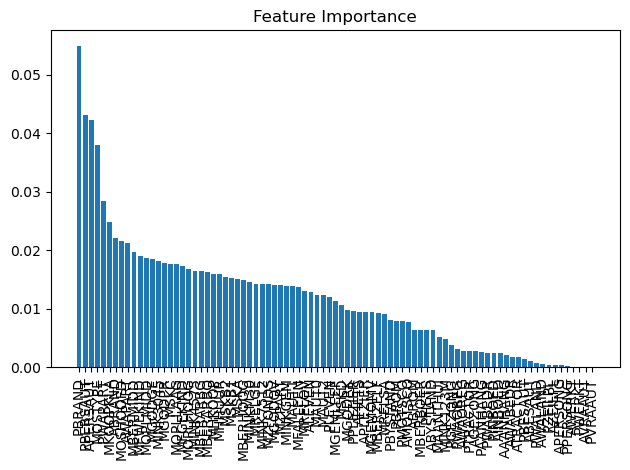

In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rfc = RandomForestClassifier(n_estimators=500, random_state=1)

rfc.fit(X_train_std, y_train.values.ravel())


y_pred = rfc.predict(X_test_std)
print("Random Forest based on feature importance feature selection accuracy: %.3f" %metrics.accuracy_score(Y_test, y_pred))
 
importances = rfc.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
        feat_labels[sorted_indices[f]],
        importances[sorted_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()